In [2]:
import numpy as np
from data import Instance, DataSet
from miscellaneous import initialize_data, plot_graph, plot_points
from neural_network import NeuralNetwork
from activation_function import *
import matplotlib.pyplot as plt
from keras.datasets import mnist
import copy

/home/xeds/.conda/envs/atividade1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Leitura do conjunto de dados

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Descobrindo o número de instâncias e as dimensões de cada uma

In [4]:
num_instances, dim_x, dim_y = x_train.shape
num_instances += x_test.shape[0]

### Normalizando

In [5]:
#Treinamento
norm_input_train = [np.divide(i.astype(np.float32),255).flatten() for i in x_train]

output_train = []
y = 10*[0.0]

for n in y_train:
    y[n] = 1.0
    output_train.append(copy.deepcopy(y))
    y[n] = 0.0

In [6]:
#Teste
norm_input_test = [np.divide(i.astype(np.float32),255).flatten() for i in x_test]

output_test = []
y = 10*[0.0]

for n in y_test:
    y[n] = 1.0
    output_test.append(copy.deepcopy(y))
    y[n] = 0.0

### Organizando o dataset para ser passado no padrão aceito pela rede neural

In [7]:
dataset = DataSet() 

for i,j in zip(norm_input_train + norm_input_test, output_train + output_test):
    dataset.add(Instance(i,j))

### Criando as redes neurais

#### Rede neural 1

In [7]:
net_1 = NeuralNetwork(dim_x*dim_y ,[10], [sig_func])
data_1 = net_1.fit(dataset, "mini-batch", 50, learning_rate = 0.1, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], print_info = True)

Epoch 1/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.0706 - categorical_accuracy: 0.6181
Epoch 2/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.0448 - categorical_accuracy: 0.8168
Epoch 3/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.0376 - categorical_accuracy: 0.8416
Epoch 4/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.0339 - categorical_accuracy: 0.8531
Epoch 5/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.0316 - categorical_accuracy: 0.8608
Epoch 6/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.0300 - categorical_accuracy: 0.8659
Epoch 7/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.0288 - categorical_accuracy: 0.8695
Epoch 8/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.0278 - categorical_accuracy: 0.8726
Epoch 9/50
60000/60000 [==============================] - 5s

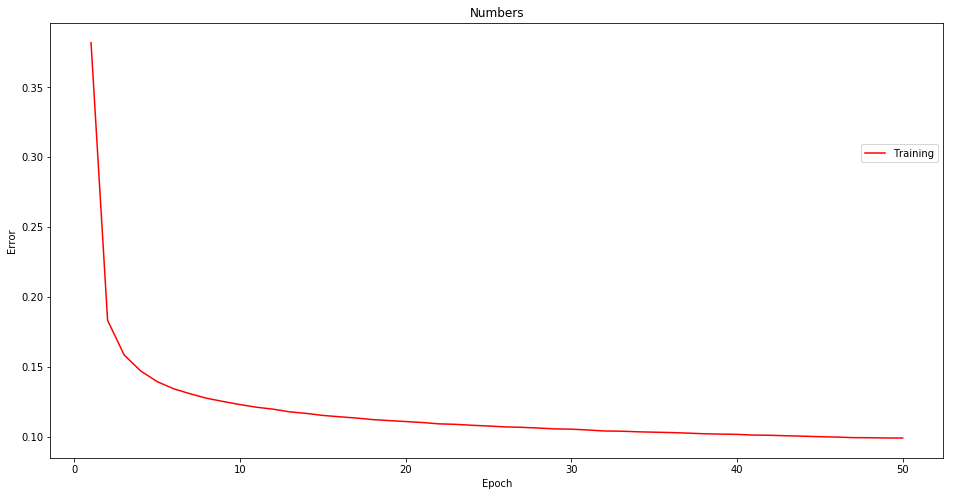

In [8]:
plot_graph(data_1, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 2

In [9]:
net_2 = NeuralNetwork(dim_x*dim_y ,[10], [tanh_func])
data_2 = net_2.fit(dataset, "mini-batch", 50, learning_rate = 0.1, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], print_info = True)

Epoch 1/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.0606 - categorical_accuracy: 0.7596
Epoch 2/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.0480 - categorical_accuracy: 0.8294
Epoch 3/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.0459 - categorical_accuracy: 0.8364
Epoch 4/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.0448 - categorical_accuracy: 0.8391
Epoch 5/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0441 - categorical_accuracy: 0.8402
Epoch 6/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.0436 - categorical_accuracy: 0.8398
Epoch 7/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.0433 - categorical_accuracy: 0.8409
Epoch 8/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.0430 - categorical_accuracy: 0.8409
Epoch 9/50
60000/60000 [==============================] - 5s 82u

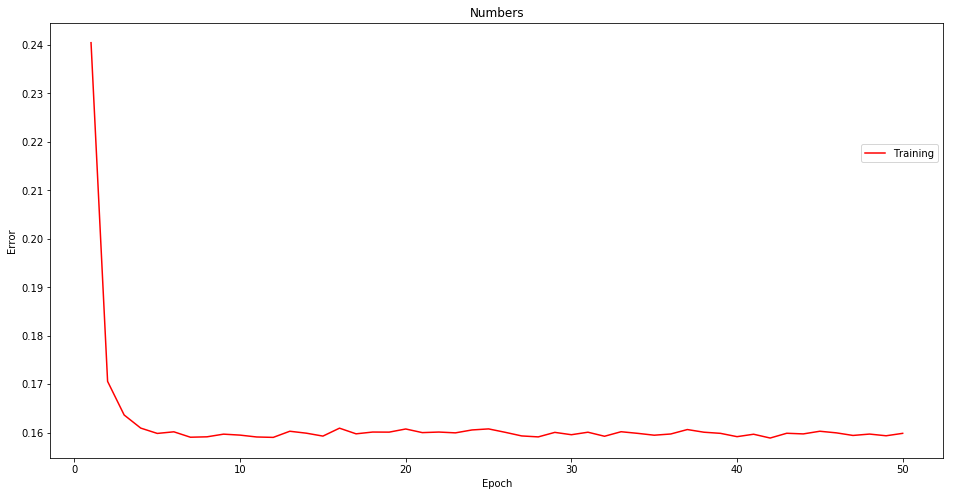

In [10]:
plot_graph(data_2, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 3

In [11]:
net_3 = NeuralNetwork(dim_x*dim_y ,[10], [sig_func]) # 92,64% treino, 92,32% teste
data_3 = net_3.fit(dataset, "mini-batch", 50, learning_rate = 0.8, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum = 0.9, print_info = True)

Epoch 1/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.0482 - categorical_accuracy: 0.6118
Epoch 2/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.0259 - categorical_accuracy: 0.8236
Epoch 3/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.0207 - categorical_accuracy: 0.8789
Epoch 4/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.0171 - categorical_accuracy: 0.9123
Epoch 5/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0166 - categorical_accuracy: 0.9140
Epoch 6/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0162 - categorical_accuracy: 0.9154
Epoch 7/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.0160 - categorical_accuracy: 0.9166
Epoch 8/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0158 - categorical_accuracy: 0.9175
Epoch 9/50
60000/60000 [==============================] - 3s 51u

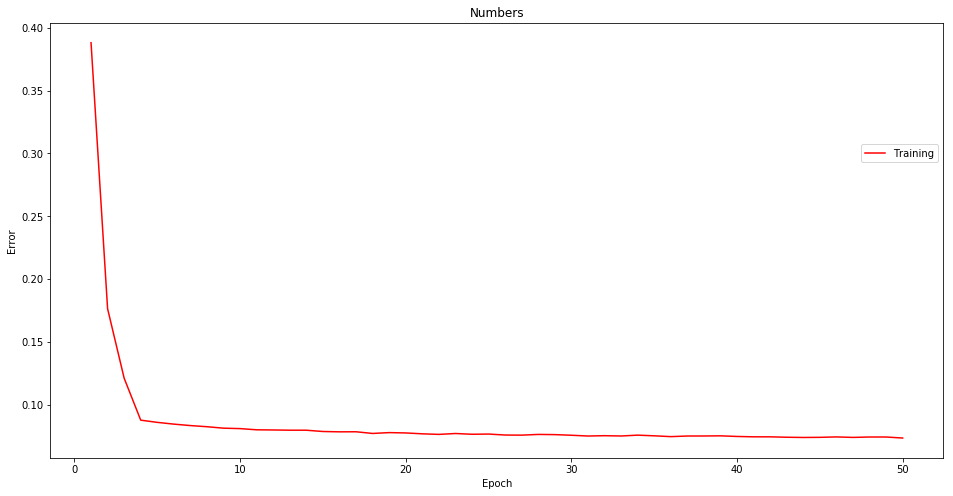

In [12]:
plot_graph(data_3, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 4

In [14]:
net_4 = NeuralNetwork(dim_x*dim_y ,[10], [tanh_func]) 
data_4 = net_4.fit(dataset, "mini-batch", 50, learning_rate = 0.8, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum = 0.9, print_info = True)

Epoch 1/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.3863 - categorical_accuracy: 0.2545
Epoch 2/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.3722 - categorical_accuracy: 0.2640
Epoch 3/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.4073 - categorical_accuracy: 0.1189
Epoch 4/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.4342 - categorical_accuracy: 0.1140
Epoch 5/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.4810 - categorical_accuracy: 0.1187
Epoch 6/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.4955 - categorical_accuracy: 0.1159
Epoch 7/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.5216 - categorical_accuracy: 0.1159
Epoch 8/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.4768 - categorical_accuracy: 0.1084
Epoch 9/50
60000/60000 [==============================] - 6s 107

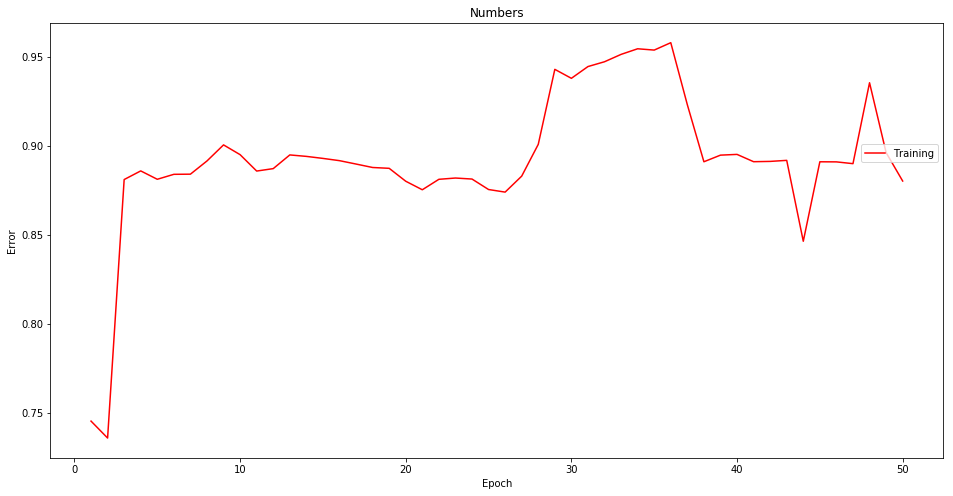

In [15]:
plot_graph(data_4, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 5

In [17]:
net_5 = NeuralNetwork(dim_x*dim_y ,[768,10], 2*[sig_func])
data_5 = net_5.fit(dataset,"mini-batch", 50, learning_rate = 0.1, type = "class",  mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum = 0.5, print_info = True)

Epoch 1/50
60000/60000 [==============================] - 20s 328us/step - loss: 0.0789 - categorical_accuracy: 0.4784
Epoch 2/50
60000/60000 [==============================] - 20s 338us/step - loss: 0.0546 - categorical_accuracy: 0.7472
Epoch 3/50
60000/60000 [==============================] - 20s 331us/step - loss: 0.0422 - categorical_accuracy: 0.8157
Epoch 4/50
60000/60000 [==============================] - 20s 334us/step - loss: 0.0360 - categorical_accuracy: 0.8411
Epoch 5/50
60000/60000 [==============================] - 20s 339us/step - loss: 0.0322 - categorical_accuracy: 0.8539
Epoch 6/50
60000/60000 [==============================] - 20s 337us/step - loss: 0.0297 - categorical_accuracy: 0.8619
Epoch 7/50
60000/60000 [==============================] - 21s 345us/step - loss: 0.0279 - categorical_accuracy: 0.8676
Epoch 8/50
60000/60000 [==============================] - 20s 334us/step - loss: 0.0265 - categorical_accuracy: 0.8719
Epoch 9/50
60000/60000 [========================

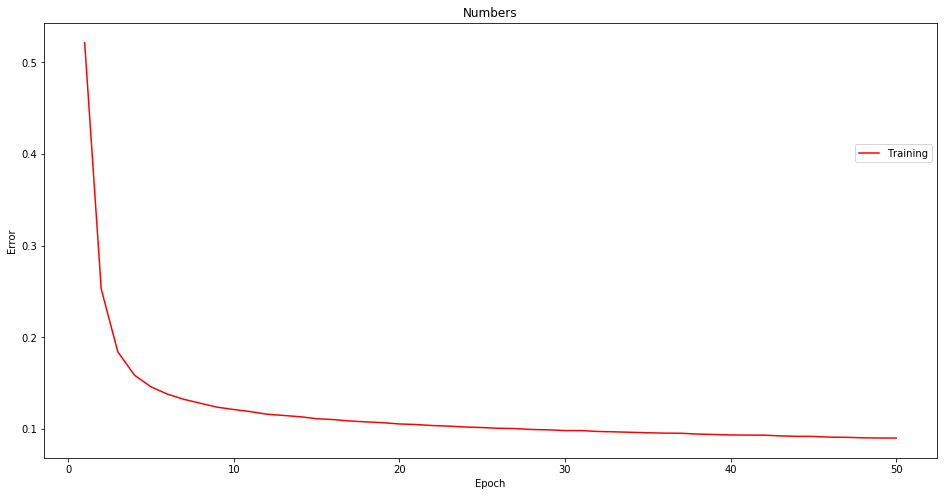

In [18]:
plot_graph(data_5, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 6

In [19]:
net_6 = NeuralNetwork(dim_x*dim_y ,[768,10], 2*[tanh_func])
data_6 = net_6.fit(dataset,"mini-batch", 50, learning_rate = 0.1, type = "class",  mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum = 0.5, print_info = True)

Epoch 1/50
60000/60000 [==============================] - 21s 347us/step - loss: 0.0471 - categorical_accuracy: 0.8307
Epoch 2/50
60000/60000 [==============================] - 21s 347us/step - loss: 0.0349 - categorical_accuracy: 0.8858
Epoch 3/50
60000/60000 [==============================] - 21s 354us/step - loss: 0.0291 - categorical_accuracy: 0.9104
Epoch 4/50
60000/60000 [==============================] - 21s 356us/step - loss: 0.0260 - categorical_accuracy: 0.9220
Epoch 5/50
60000/60000 [==============================] - 20s 339us/step - loss: 0.0239 - categorical_accuracy: 0.9297
Epoch 6/50
60000/60000 [==============================] - 20s 334us/step - loss: 0.0222 - categorical_accuracy: 0.9348
Epoch 7/50
60000/60000 [==============================] - 21s 349us/step - loss: 0.0208 - categorical_accuracy: 0.9393
Epoch 8/50
60000/60000 [==============================] - 21s 345us/step - loss: 0.0198 - categorical_accuracy: 0.9438
Epoch 9/50
60000/60000 [========================

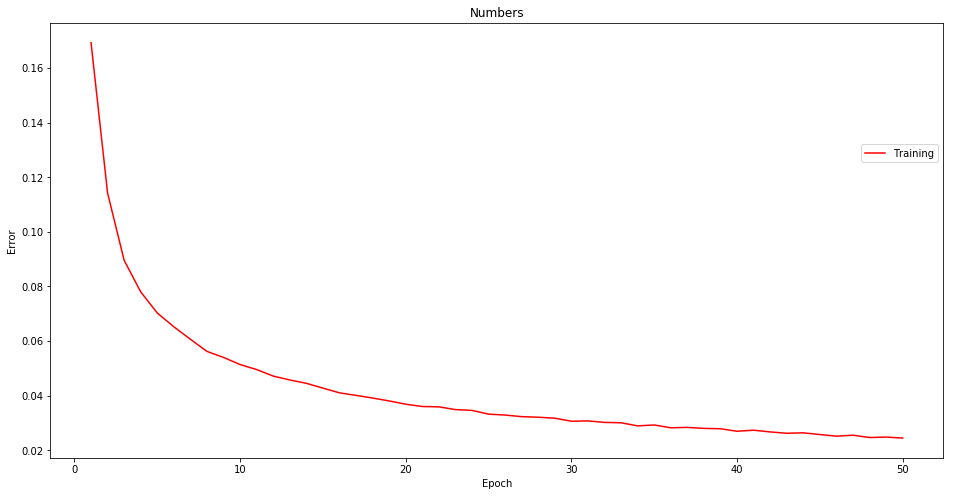

In [20]:
plot_graph(data_6, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 7

In [21]:
net_7 = NeuralNetwork(dim_x*dim_y ,[50, 10], 2*[sig_func]) # 99.10% / 97.16%
data_7 = net_7.fit(dataset, "mini-batch", 100, learning_rate = 0.8, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum = 0.9, print_info = True)

Epoch 1/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.0533 - categorical_accuracy: 0.5658
Epoch 2/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0318 - categorical_accuracy: 0.7616
Epoch 3/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.0135 - categorical_accuracy: 0.9247
Epoch 4/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.0110 - categorical_accuracy: 0.9377
Epoch 5/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.0097 - categorical_accuracy: 0.9453
Epoch 6/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.0088 - categorical_accuracy: 0.9498
Epoch 7/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.0081 - categorical_accuracy: 0.9544
Epoch 8/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0076 - categorical_accuracy: 0.9571
Epoch 9/100
60000/60000 [==============================

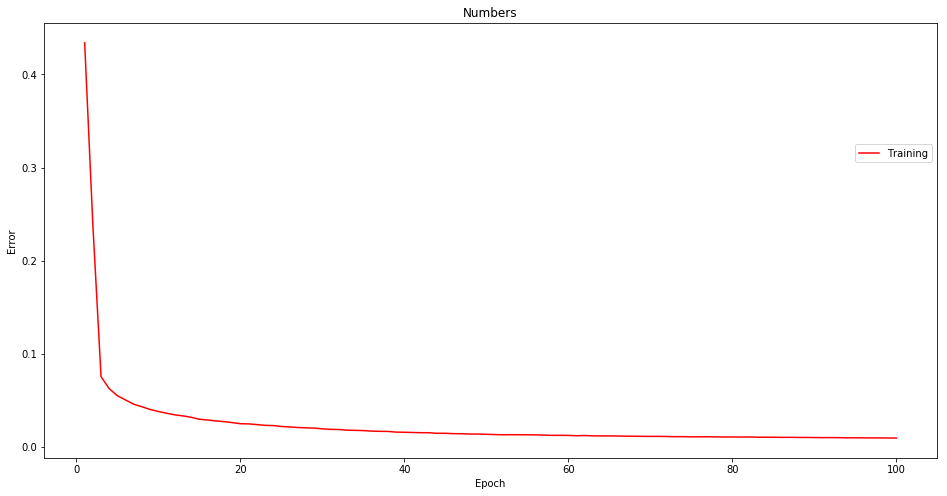

In [22]:
plot_graph(data_7, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 8

In [ ]:
net_8 = NeuralNetwork(dim_x*dim_y ,[50, 10], 2*[tanh_func]) 
data_8 = net_8.fit(dataset, "mini-batch", 100, learning_rate = 0.7, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum = 0.9, print_info = True)

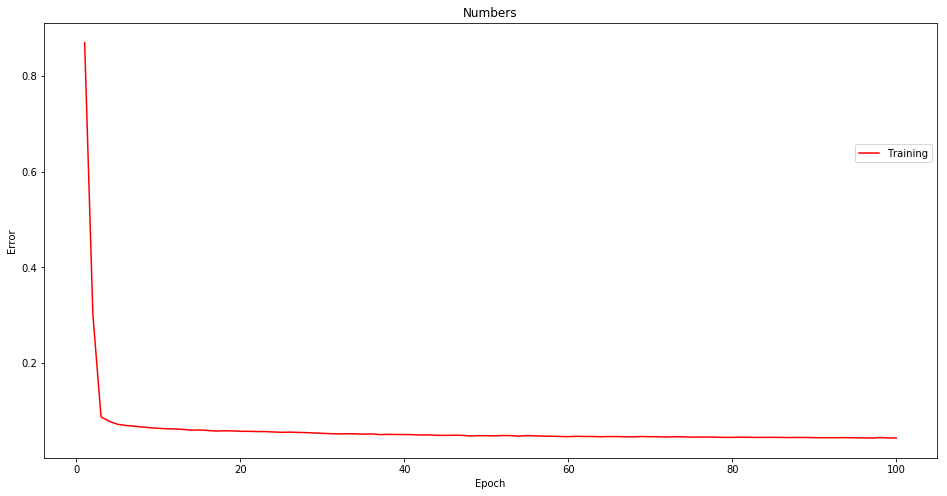

In [10]:
plot_graph(data_8, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 9

In [15]:
net_9 = NeuralNetwork(dim_x*dim_y ,[30, 20, 10], 3*[sig_func]) #99.29% / 96.79%
data_9 = net_9.fit(dataset, "mini-batch", 100, learning_rate = 0.8, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum = 0.9, print_info = True)

Epoch 1/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.0599 - categorical_accuracy: 0.5581
Epoch 2/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.0175 - categorical_accuracy: 0.9015
Epoch 3/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.0125 - categorical_accuracy: 0.9262
Epoch 4/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.0103 - categorical_accuracy: 0.9386
Epoch 5/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.0090 - categorical_accuracy: 0.9471
Epoch 6/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.0080 - categorical_accuracy: 0.9530
Epoch 7/100
60000/60000 [==============================] - 5s 92us/step - loss: 0.0073 - categorical_accuracy: 0.9569
Epoch 8/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.0068 - categorical_accuracy: 0.9608
Epoch 9/100
60000/60000 [==============================]

/home/xeds/.conda/envs/atividade1/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.557841). Check your callbacks.
  % delta_t_median)
/home/xeds/.conda/envs/atividade1/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.279372). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 5s 81us/step - loss: 0.0050 - categorical_accuracy: 0.9719
Epoch 15/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.0048 - categorical_accuracy: 0.9734
Epoch 16/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.0046 - categorical_accuracy: 0.9743
Epoch 17/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.0045 - categorical_accuracy: 0.9746
Epoch 18/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.0043 - categorical_accuracy: 0.9759
Epoch 19/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.0042 - categorical_accuracy: 0.9766
Epoch 20/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.0041 - categorical_accuracy: 0.9776
Epoch 21/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.0040 - categorical_accuracy: 0.9781
Epoch 22/100
60000/60000 [==============================] - 4

60000/60000 [==============================] - 3s 58us/step - loss: 0.0015 - categorical_accuracy: 0.9918
Epoch 83/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.0015 - categorical_accuracy: 0.9919
Epoch 84/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.0015 - categorical_accuracy: 0.9917
Epoch 85/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.0014 - categorical_accuracy: 0.9919
Epoch 86/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.0014 - categorical_accuracy: 0.9919
Epoch 87/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0014 - categorical_accuracy: 0.9922
Epoch 88/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.0014 - categorical_accuracy: 0.9921
Epoch 89/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.0014 - categorical_accuracy: 0.9920
Epoch 90/100
60000/60000 [==============================] - 5

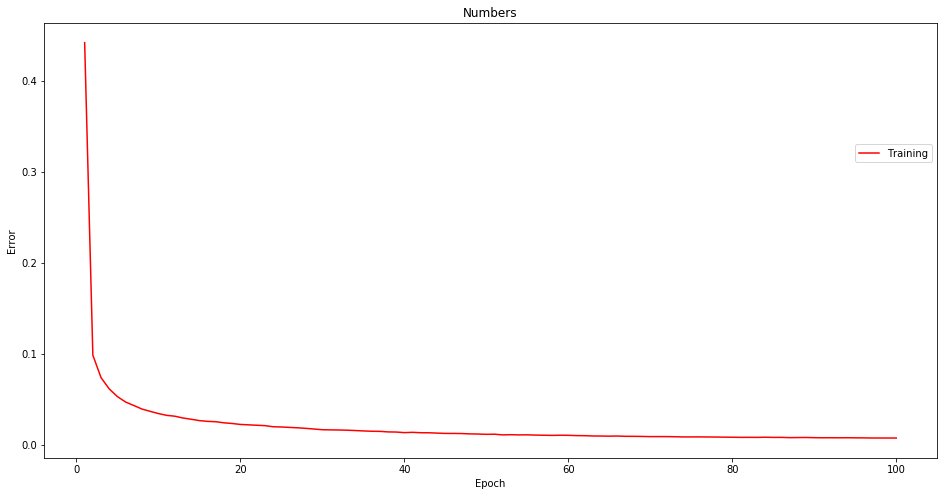

In [16]:
plot_graph(data_9, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 10

In [29]:
net_10 = NeuralNetwork(dim_x*dim_y ,[30,20,10], 3*[tanh_func])
data_10 = net_10.fit(dataset,"mini-batch", 100, learning_rate = 0.8, type = "class",  mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum = 0.9, print_info = True)

Epoch 1/100
60000/60000 [==============================] - 9s 145us/step - loss: 0.0276 - categorical_accuracy: 0.8724
Epoch 2/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.0140 - categorical_accuracy: 0.9295
Epoch 3/100
60000/60000 [==============================] - 7s 115us/step - loss: 0.0121 - categorical_accuracy: 0.9371
Epoch 4/100
60000/60000 [==============================] - 8s 128us/step - loss: 0.0110 - categorical_accuracy: 0.9423
Epoch 5/100
60000/60000 [==============================] - 8s 128us/step - loss: 0.0102 - categorical_accuracy: 0.9477
Epoch 6/100
60000/60000 [==============================] - 7s 112us/step - loss: 0.0097 - categorical_accuracy: 0.9501
Epoch 7/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.0092 - categorical_accuracy: 0.9521
Epoch 8/100
60000/60000 [==============================] - 8s 132us/step - loss: 0.0089 - categorical_accuracy: 0.9543
Epoch 9/100
60000/60000 [=======================

In [ ]:
plot_graph(data_7, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)